In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from pylab import imread,subplot,imshow,show
import cv2
import os

In [2]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [3]:
train='dataset/train/'

In [4]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 4704 files belonging to 4 classes.
Using 3764 files for training.


In [5]:
val='dataset/train/'

In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 4704 files belonging to 4 classes.
Using 940 files for validation.


In [7]:
test='dataset/test/'

In [8]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 1228 files belonging to 4 classes.


In [9]:
class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

In [10]:
train_data.class_names = class_names
val_data.class_names = class_names

In [11]:
print(val_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


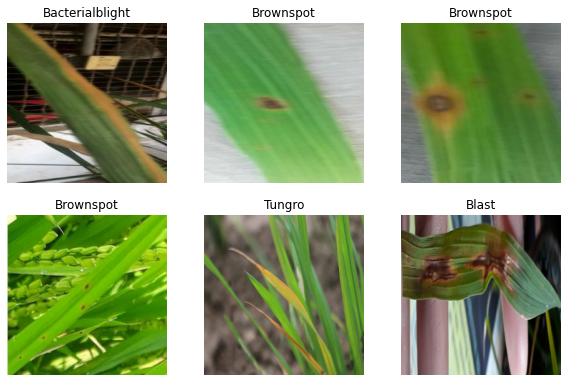

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.layers import Dense

In [14]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(133,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9

In [16]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
history = model.fit(train_data, validation_data=val_data, epochs=50)

Epoch 1/50
118/118 [==============================] - 18s 83ms/step - loss: 1.5163 - accuracy: 0.3804 - val_loss: 1.1079 - val_accuracy: 0.4745
Epoch 2/50
118/118 [==============================] - 8s 70ms/step - loss: 0.9836 - accuracy: 0.6031 - val_loss: 0.8755 - val_accuracy: 0.6468
Epoch 3/50
118/118 [==============================] - 9s 76ms/step - loss: 0.7844 - accuracy: 0.6974 - val_loss: 0.8346 - val_accuracy: 0.6734
Epoch 4/50
118/118 [==============================] - 9s 73ms/step - loss: 0.6238 - accuracy: 0.7617 - val_loss: 0.5694 - val_accuracy: 0.7809
Epoch 5/50
118/118 [==============================] - 8s 71ms/step - loss: 0.4955 - accuracy: 0.8108 - val_loss: 0.4990 - val_accuracy: 0.8000
Epoch 6/50
118/118 [==============================] - 9s 71ms/step - loss: 0.4201 - accuracy: 0.8390 - val_loss: 0.4245 - val_accuracy: 0.8362
Epoch 7/50
118/118 [==============================] - 8s 70ms/step - loss: 0.3345 - accuracy: 0.8746 - val_loss: 0.3461 - val_accuracy: 0.874

In [18]:
model.save("weight.h5")

In [19]:
model.evaluate(val_data)

30/30 [==============================] - 1s 35ms/step - loss: 0.0690 - accuracy: 0.9851


[0.06897620856761932, 0.9851064085960388]

In [20]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open('weight.tflite','wb').write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmps9lx5422\assets


714592

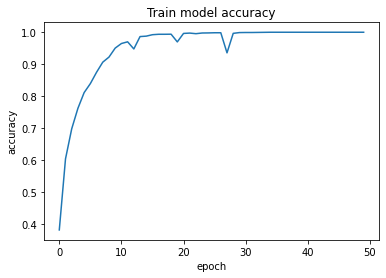

In [21]:
plt.plot(history.history['accuracy'])
plt.title('Train model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

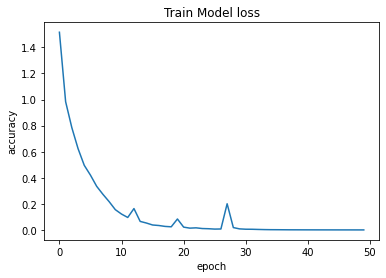

In [22]:
plt.plot(history.history['loss'])
plt.title('Train Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

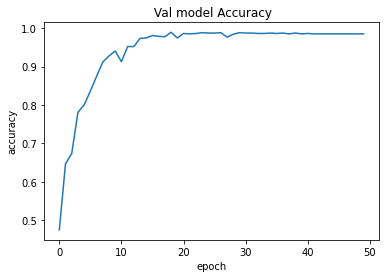

In [23]:
plt.plot(history.history['val_accuracy'])
plt.title(' Val model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

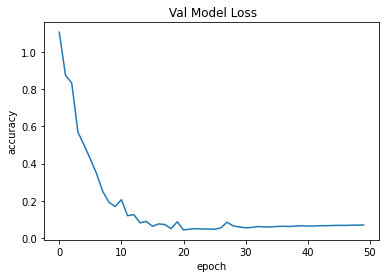

In [24]:
plt.plot(history.history['val_loss'])
plt.title(' Val Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

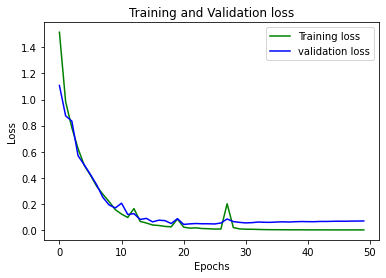

In [25]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

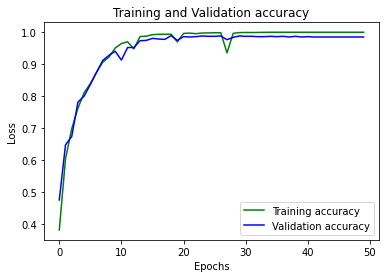

In [26]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
class_names={0:"Bacterialblight", 1:"Blast", 2:"Brownspot", 3:"Tungro"}

In [28]:
for images, labels in val_data.take(1):
    for i in range(6):
        print("True_class:",val_data.class_names[labels[i]])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))
        if p==0:
            print("Predicted Image: Bacterialblight")
        elif p==1:
            print("Predicted Image: Blast")
        elif p==2:
            print("Predicted Image: Brownspot")
        else:
            print("Predicted Image: Tungro")
        
        print("Predicted class:",p)

True_class: Blast
Predicted Image: Blast
Predicted class: 1
True_class: Tungro
Predicted Image: Tungro
Predicted class: 3
True_class: Brownspot
Predicted Image: Brownspot
Predicted class: 2
True_class: Blast
Predicted Image: Blast
Predicted class: 1
True_class: Tungro
Predicted Image: Tungro
Predicted class: 3
True_class: Brownspot
Predicted Image: Brownspot
Predicted class: 2
